In [1]:
%matplotlib inline
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()

In [2]:
path = "/data/POL/HALOA/output_01274"
#path = "/media/arturo/ARTUROTECA/OUTPUTS/HaloB/output_00417"
myhalo = wkbl.Galaxy_Hound(path,"halo,gas,stars",comov=True,getcen=False)

loading Dark matter..
is valid  True
loading Gas..
loading Stars..


In [3]:
ok,rho_st,_= CF.getDensity(np.array(myhalo.st.pos3d.reshape(len(myhalo.st.pos3d)*3),dtype=np.float32), myhalo.st.mass)

In [4]:
print myhalo.st.pos3d[:,1].min(), myhalo.st.pos3d[:,1].max()
print myhalo.dm.pos3d[:,1].min(), myhalo.dm.pos3d[:,1].max()
print myhalo.gs.pos3d[:,1].min(), myhalo.gs.pos3d[:,1].max()

6875.9 11754.9
0.0419994 19914.6
77.7916 19836.9


In [5]:
centro_rho = myhalo.st.pos3d[np.where(rho_st==rho_st.max())]
#centro_com = np.array([-1.64521174, -0.1218235,   0.52621438])

myhalo.st.pos3d = myhalo.st.pos3d - centro_rho
myhalo.dm.pos3d = myhalo.dm.pos3d - centro_rho
myhalo.gs.pos3d = myhalo.gs.pos3d - centro_rho

myhalo.st.r = np.sqrt((myhalo.st.pos3d[:,0]**2)+(myhalo.st.pos3d[:,1]**2)+(myhalo.st.pos3d[:,2]**2))
myhalo.dm.r = np.sqrt((myhalo.dm.pos3d[:,0]**2)+(myhalo.dm.pos3d[:,1]**2)+(myhalo.dm.pos3d[:,2]**2))
myhalo.gs.r = np.sqrt((myhalo.gs.pos3d[:,0]**2)+(myhalo.gs.pos3d[:,1]**2)+(myhalo.gs.pos3d[:,2]**2))


In [6]:
myhalo.dm.mass = myhalo.dm.mass[np.where(myhalo.dm.r<300.)]
myhalo.dm.pos3d = myhalo.dm.pos3d[np.where(myhalo.dm.r<300.)]
myhalo.dm.vel3d = myhalo.dm.vel3d[np.where(myhalo.dm.r<300.)]
myhalo.dm.r = myhalo.dm.r[np.where(myhalo.dm.r<300)]

myhalo.st.mass = myhalo.st.mass[np.where(myhalo.st.r<300.)]
myhalo.st.pos3d = myhalo.st.pos3d[np.where(myhalo.st.r<300.)]
myhalo.st.r = myhalo.st.r[np.where(myhalo.st.r<300)]

myhalo.gs.mass = myhalo.gs.mass[np.where(myhalo.gs.r<300.)]
myhalo.gs.pos3d = myhalo.gs.pos3d[np.where(myhalo.gs.r<300.)]
myhalo.gs.r = myhalo.gs.r[np.where(myhalo.gs.r<300)]
myhalo.gs.rho = myhalo.gs.rho[np.where(myhalo.gs.r<300)]
myhalo.gs.hsml = myhalo.gs.hsml[np.where(myhalo.gs.r<300)]

In [7]:
average = np.array([np.mean(myhalo.dm.vel3d[:,0]),
                    np.mean(myhalo.dm.vel3d[:,1]),
                    np.mean(myhalo.dm.vel3d[:,2])
                   ])
print "average = ", average


myhalo.dm.vel3d = myhalo.dm.vel3d - average

average =  [ -14.28530788  -63.3508606  -103.3469162 ]


In [8]:
myhalo.dm.R = np.sqrt((myhalo.dm.pos3d[:,0]**2)+(myhalo.dm.pos3d[:,1]**2))
myhalo.dm.vr = (myhalo.dm.vel3d[:,0]*myhalo.dm.pos3d[:,0] + \
                myhalo.dm.vel3d[:,1]*myhalo.dm.pos3d[:,1] + \
                myhalo.dm.vel3d[:,2]*myhalo.dm.pos3d[:,2])/ myhalo.dm.r

myhalo.dm.vphi = (-myhalo.dm.vel3d[:,0]*myhalo.dm.pos3d[:,1] +\
                   myhalo.dm.vel3d[:,1]*myhalo.dm.pos3d[:,0] )/ myhalo.dm.R 

In [9]:
myhalo.rotate_galaxy()

In [23]:
print rho_st.mean()

1.95414e+08


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7896088 but corresponding boolean dimension is 5946301


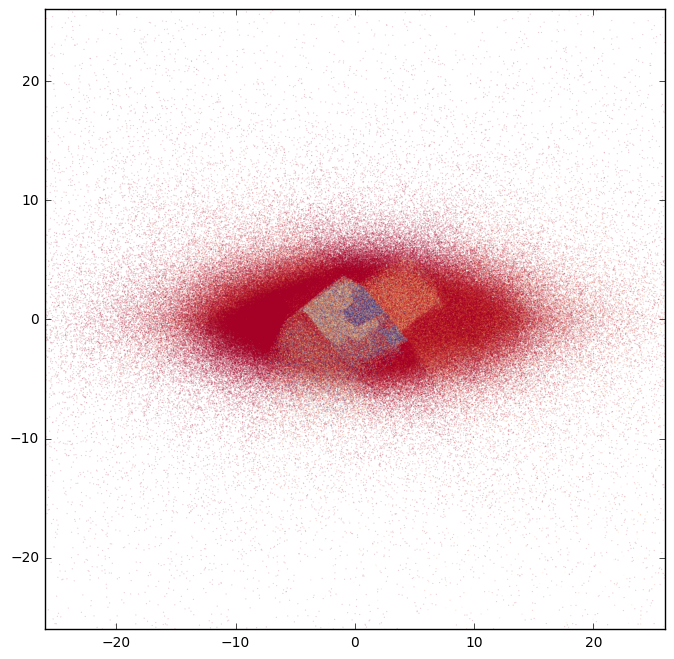

In [28]:
fig ,ax = plt.subplots(figsize=[8,8])
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-26,26])
ax.set_ylim([-26,26])

co = (myhalo.st.pos3d[:,1]>-5)&(myhalo.st.pos3d[:,1]<0)
ax.scatter(myhalo.st.pos3d[co,0],myhalo.st.pos3d[co,2],c=rho_st[co], cmap=cm,vmin=1e8, vmax=9e8,lw=0, s=0.8,alpha=0.2)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7896088 but corresponding boolean dimension is 5946301


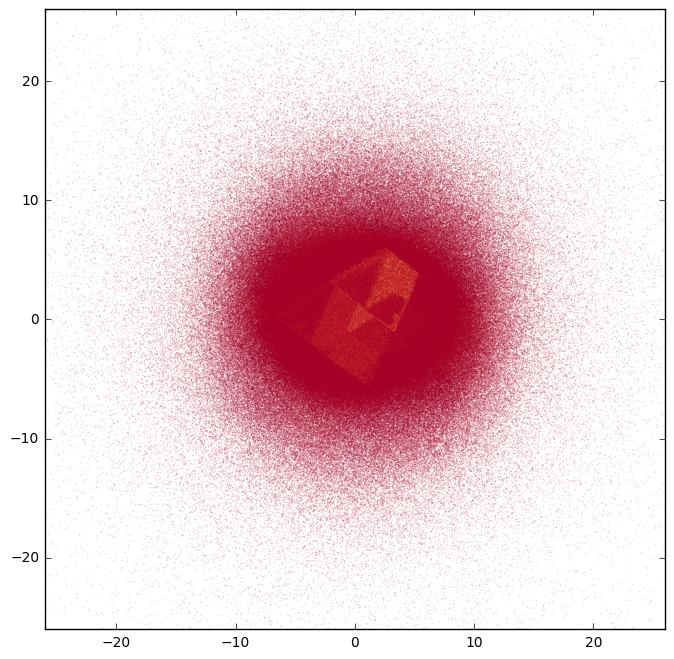

In [39]:
fig ,ax = plt.subplots(figsize=[8,8])
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-26,26])
ax.set_ylim([-26,26])

co = (myhalo.st.pos3d[:,2]>-1)&(myhalo.st.pos3d[:,2]<0)
ax.scatter(myhalo.st.pos3d[co,0],myhalo.st.pos3d[co,1],c=rho_st[co], cmap=cm,lw=0, s=0.8,alpha=0.2,vmax=1e10)

In [75]:
centros1000 = np.array([])
nums1000 = np.array([])

for i in range(10000,20000,1000):
    print i
    po = np.copy(myhalo.st.pos3d)
    ma = np.copy(myhalo.st.mass)
    centros1000 = np.append(centros1000,nbe.real_center(po,ma,n=i))
    nums1000 = np.append(nums1000,i)

10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [69]:
centros500 = np.array([])
nums500 = np.array([])

for i in range(1000,12000,500):
    print i
    po = np.copy(myhalo.st.pos3d)
    ma = np.copy(myhalo.st.mass)
    centros500 = np.append(centros500,nbe.real_center(po,ma,n=i))
    nums500 = np.append(nums500,i)

1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500


In [63]:
centros = np.array([])
nums = np.array([])

for i in range(200,4000,200):
    print i
    po = np.copy(myhalo.st.pos3d)
    ma = np.copy(myhalo.st.mass)
    centros = np.append(centros,nbe.real_center(po,ma,n=i))
    nums = np.append(nums,i)
    

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [76]:
c = centros.reshape((len(centros)/3,3))
mod = np.sqrt(c[:,0]**2 + c[:,1]**2 + c[:,2]**2)

c500 = centros500.reshape((len(centros500)/3,3))
mod500 = np.sqrt(c500[:,0]**2 + c500[:,1]**2 + c500[:,2]**2)

c1000 = centros1000.reshape((len(centros1000)/3,3))
mod1000 = np.sqrt(c1000[:,0]**2 + c1000[:,1]**2 + c1000[:,2]**2)

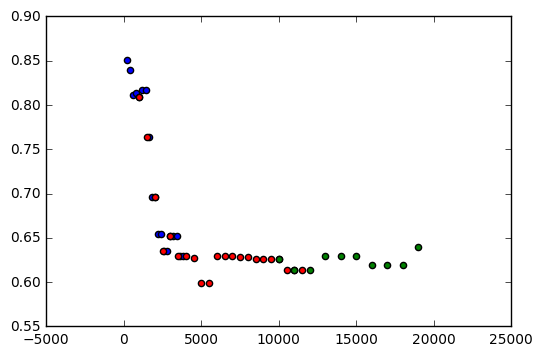

In [78]:
fig, ax = plt.subplots()
ax.scatter(nums,mod)
ax.scatter(nums500,mod500,c='r')
ax.scatter(nums1000,mod1000,c='g')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7896088 but corresponding boolean dimension is 5946301


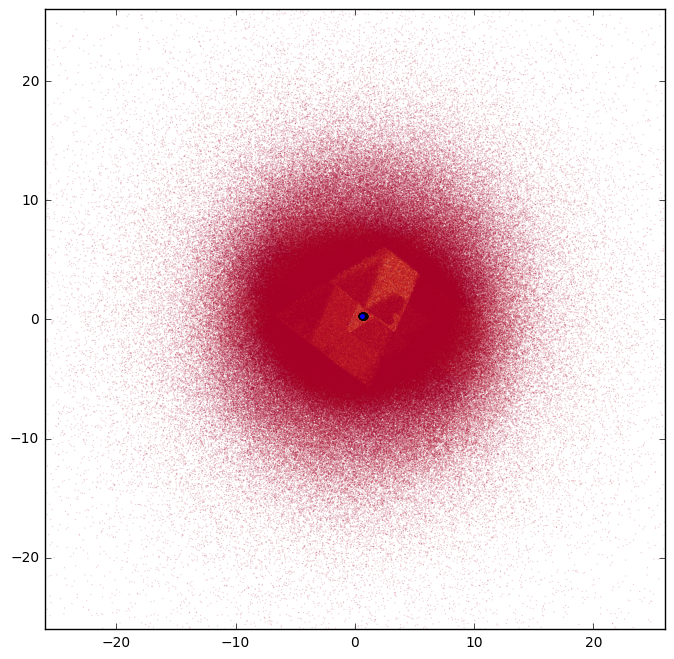

In [66]:
fig ,ax = plt.subplots(figsize=[8,8])
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-26,26])
ax.set_ylim([-26,26])

co = (myhalo.st.pos3d[:,2]>-1)&(myhalo.st.pos3d[:,2]<0)
ax.scatter(myhalo.st.pos3d[co,0],myhalo.st.pos3d[co,1],c=rho_st[co], cmap=cm,lw=0, s=0.8,alpha=0.2,vmax=1e10)

ax.scatter(c[:,0],c[:,1])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7896088 but corresponding boolean dimension is 5946301


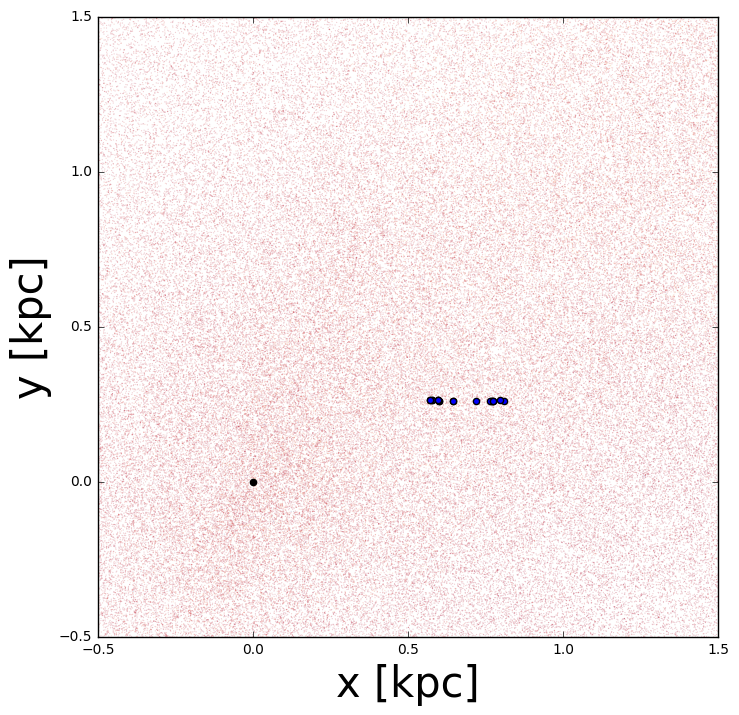

In [67]:
fig ,ax = plt.subplots(figsize=[8,8])
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_xlabel('x [kpc]', fontsize=30)
ax.set_ylabel('y [kpc]', fontsize=30)

co = (myhalo.st.pos3d[:,2]>-1)&(myhalo.st.pos3d[:,2]<0)
ax.scatter(myhalo.st.pos3d[co,0],myhalo.st.pos3d[co,1],c=rho_st[co], cmap=cm,lw=0, s=0.8,alpha=0.2,vmax=1e10)

ax.scatter(c[:,0],c[:,1])
ax.scatter(0,0,c='k',marker='o')

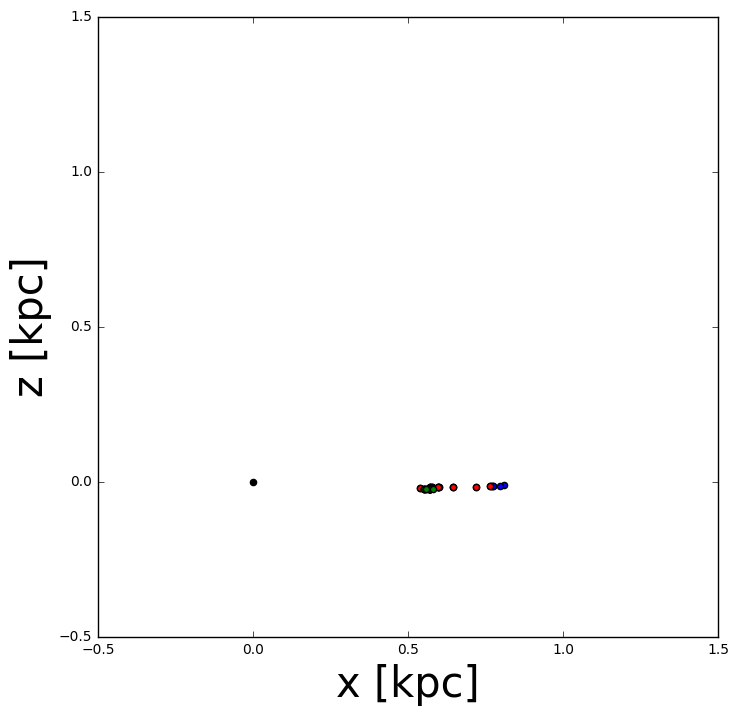

In [79]:
fig ,ax = plt.subplots(figsize=[8,8])
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_xlabel('x [kpc]', fontsize=30)
ax.set_ylabel('z [kpc]', fontsize=30)
co = (myhalo.st.pos3d[:,1]>-1)&(myhalo.st.pos3d[:,1]<0)
#ax.scatter(myhalo.st.pos3d[co,0],myhalo.st.pos3d[co,2],c=rho_st[co], cmap=cm,lw=0, s=0.8,alpha=0.2,vmax=1e10)
#for i in range(len(c)):
ax.scatter(c[:,0],c[:,2])
#ax.text(c[i,0]-(0.02*i),c[i,2]+((-1)**i)*i*0.05,"{0:}".format(nums[i]))
ax.scatter(c500[:,0],c500[:,2], c='r')
ax.scatter(c1000[:,0],c1000[:,2], c='g')
    
ax.scatter(0,0,c='k',marker='o')